In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv("iris.csv")

In [72]:
## Checking for class distribution
group = iris.groupby("variety")
  
# count the observations
group.count()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,50,50,50,50
Versicolor,50,50,50,50
Virginica,50,50,50,50


We observe that our dataset is perfectly balances with no missing values

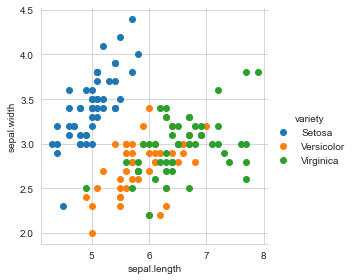

In [84]:
## Initial EDA
sns.set_style("whitegrid");
sns.FacetGrid(iris,hue="variety",height=4) \
    .map(plt.scatter,"sepal.length","sepal.width") \
    .add_legend()
plt.show()

Based on Sepal Length and Sepal Width, we can clealy see that Setosa class tend to have a shorter and wider as compared to other two.

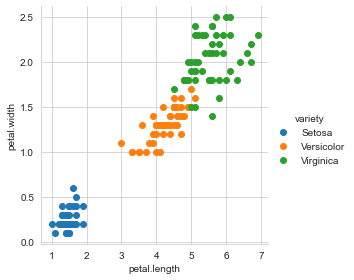

In [86]:
## Initial EDA
sns.set_style("whitegrid");
sns.FacetGrid(iris,hue="variety",height=4) \
    .map(plt.scatter,"petal.length","petal.width") \
    .add_legend()
plt.show()

Comparing the flowers based on petal lengths and width, we observe that Setosa tend to be shorter and narrower, while Virginica are long and wide.

In [3]:
x=iris.iloc[:,:4] #First 4 columns
y=iris["variety"] #Target Variable

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

### Building KNN for K = 1

In [56]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1, metric = 'minkowski', p = 2)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


### Knn for K = 3

In [58]:
knn2 = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski', p = 2)

#Train the model
knn2.fit(X_train, y_train)

#Predict the response
y_pred2 = knn2.predict(X_test)

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.9777777777777777


### KNN for K = 5

In [60]:
knn3 = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)

#Train the model
knn3.fit(X_train, y_train)

#Predict the response
y_pred3 = knn3.predict(X_test)

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.9777777777777777


### KNN for K = 7

In [62]:
knn4 = KNeighborsClassifier(n_neighbors=7, metric = 'minkowski', p = 2)

#Train the model
knn4.fit(X_train, y_train)

#Predict the response
y_pred4 = knn4.predict(X_test)

In [65]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred4))

Accuracy: 0.9777777777777777


The accuracy of the model is not changing as we change the values of k from 3->7, to assess the performance of each model we will be looking at other metrics such as sensitivity 

In [75]:
print("For K = 1",metrics.classification_report(y_test,y_pred),sep='\n')

For K = 1
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.86      1.00      0.92        12
   Virginica       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [76]:
print("For K = 3",metrics.classification_report(y_test,y_pred2),sep='\n')

For K = 3
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.92      1.00      0.96        12
   Virginica       1.00      0.95      0.97        19

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [77]:
print("For K = 5",metrics.classification_report(y_test,y_pred3),sep='\n')

For K = 5
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.92      1.00      0.96        12
   Virginica       1.00      0.95      0.97        19

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [78]:
print("For K = 7",metrics.classification_report(y_test,y_pred4),sep='\n')

For K = 7
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       1.00      0.92      0.96        12
   Virginica       0.95      1.00      0.97        19

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



From the above Classification Reports, we observe that K=3 and K=5 give us the best results in terms of Precision, Recall and F1 Score. We finally choose the value of K=5 because there are three classes and choosing K=3 may result in a wrong classification while a value of K=5 looks at few extra data points to give a more robust result. 

How to compute similarities? 
There various techniques to calculate similarity distances. We are using the metric known as minkowski. Minkowski equation can be written as: 

$(\Sigma \lvert{x_i - y_i}\rvert^p)^{1/p}$ 

The value of p=1 corresponds to Manhattan Distance and p=2 corresponds to Euclidean distance. For our KNN, we are computing Euclidean Distance. It measures the true straight line between any two points and hence allows us to accurately measure the distance between any two data points.